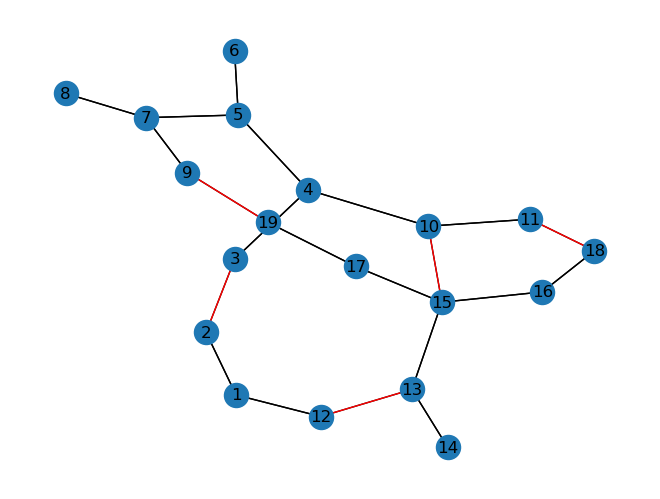

superN [[2, 12], [3, 9, 10, 11], [19, 15, 18, 13]]
switchL [(2, 3), (9, 19), (10, 15), (11, 18), (12, 13)]
superEdge [[[2, 12], [3, 9, 10, 11]], [[3, 9, 10, 11], [19, 15, 18, 13]], [[3, 9, 10, 11], [19, 15, 18, 13]], [[3, 9, 10, 11], [19, 15, 18, 13]], [[2, 12], [19, 15, 18, 13]]]
superG.edges() [('[2, 12]', '[3, 9, 10, 11]'), ('[2, 12]', '[19, 15, 18, 13]'), ('[3, 9, 10, 11]', '[19, 15, 18, 13]'), ('[3, 9, 10, 11]', '[19, 15, 18, 13]'), ('[3, 9, 10, 11]', '[19, 15, 18, 13]')]
('[2, 12]', '[3, 9, 10, 11]')
('[2, 12]', '[19, 15, 18, 13]')
('[3, 9, 10, 11]', '[19, 15, 18, 13]')
('[3, 9, 10, 11]', '[19, 15, 18, 13]')
('[3, 9, 10, 11]', '[19, 15, 18, 13]')


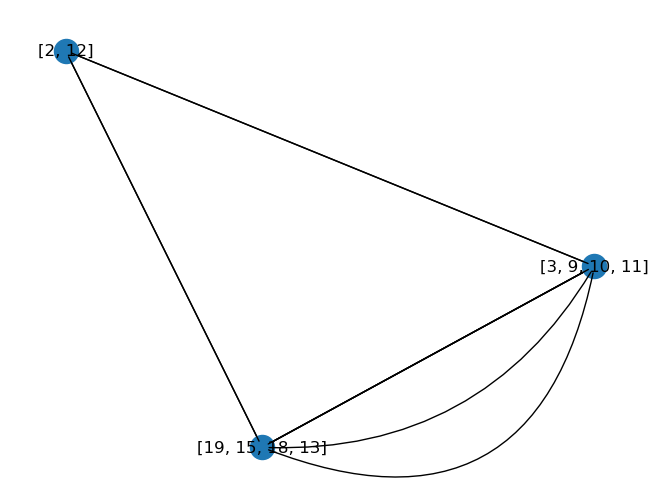

[('[2, 12]', '[3, 9, 10, 11]'), ('[2, 12]', '[19, 15, 18, 13]')]
[[0 1 1]
 [1 0 0]
 [1 0 0]]


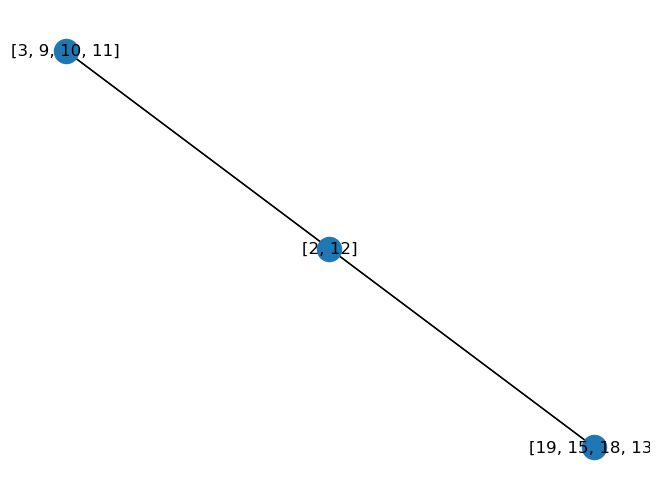

[('[2, 12]', '[19, 15, 18, 13]'), ('[19, 15, 18, 13]', '[3, 9, 10, 11]')]
[[0 1 0]
 [1 0 1]
 [0 1 0]]


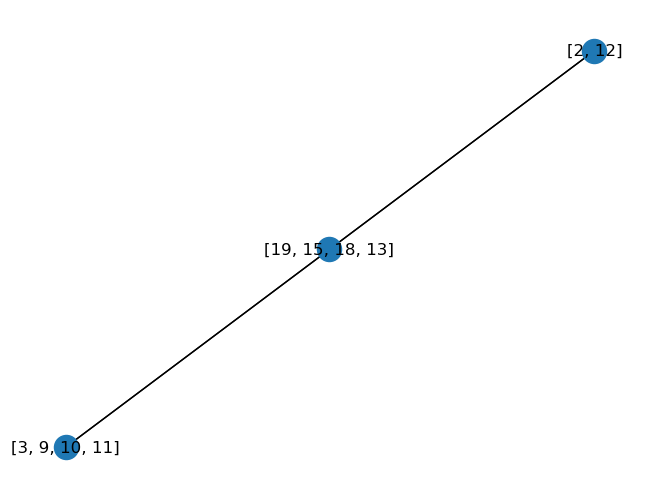

[('[2, 12]', '[3, 9, 10, 11]'), ('[3, 9, 10, 11]', '[19, 15, 18, 13]')]
[[0 1 0]
 [1 0 1]
 [0 1 0]]


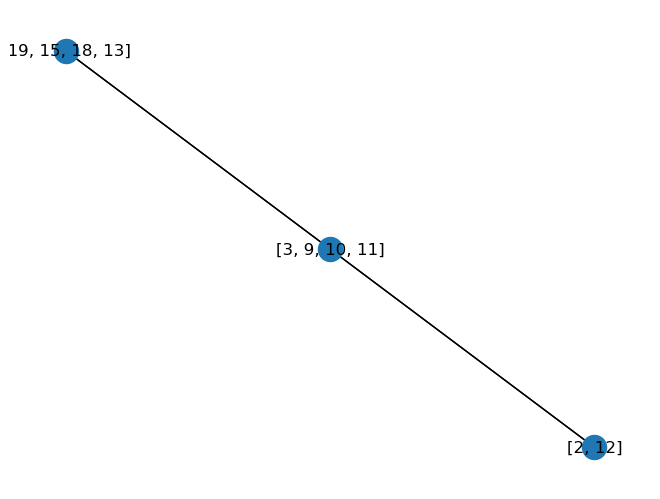

uu [('[2, 12]', '[3, 9, 10, 11]'), ('[2, 12]', '[19, 15, 18, 13]')]
uu [('[2, 12]', '[19, 15, 18, 13]'), ('[3, 9, 10, 11]', '[19, 15, 18, 13]')]
uu [('[2, 12]', '[3, 9, 10, 11]'), ('[3, 9, 10, 11]', '[19, 15, 18, 13]')]


In [25]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()

#edge_list=list of edges where the weight 's' has been attributed to switches
edge_list=[(1,2,{'w':2}),(2,3,{'w':'s'}),(3,4,{'w':2}),(4,5,{'w':2}),(5,6,{'w':2}),(5,7,{'w':2}),(7,8,{'w':2}),
           (7,9,{'w':2}),(4,10,{'w':2}),(10,11,{'w':2}),(1,12,{'w':2}),(12,13,{'w':'s'}),(13,14,{'w':2}),(13,15,{'w':2}),(15,16,{'w':2}),(15,17,{'w':2}),(16,18,{'w':2}),(17,19,{'w':2}),(11,18,{'w':'s'}),
           (10,15,{'w':'s'}),(9,19,{'w':'s'})]
#edge_list=[(1,2,{'w':2}),(2,3,{'w':'s'}),(3,4,{'w':2}),(4,5,{'w':2}),(5,6,{'w':2}),(5,7,{'w':2}),(7,8,{'w':2}),(7,9,{'w':2}),(4,10,{'w':2}),(10,11,{'w':2}),(1,12,{'w':2}),(12,13,{'w':'s'}),(13,14,{'w':2}),(13,15,{'w':2}),(15,16,{'w':2}),(15,17,{'w':2}),(16,18,{'w':2}),(17,19,{'w':2}),(11,18,{'w':'s'})]

G.add_edges_from(edge_list)

edge_labels=nx.get_edge_attributes(G, "weight")
options = {
  #  "font_size": 36,
  #  "node_size": 3000,
    "node_color": "white",
#    "edgecolors": "black",
 #   "linewidths": 5,
 #   "width": 5,
}
pos=nx.spring_layout(G)
colors=['k']*len(edge_list)
#switchL=list of switch edges
switchL=[]
i=0
for n1, n2, d in G.edges(data=True):
    if d['w']=='s':
        colors[i]='r'
        switchL.append((n1,n2))
    i=i+1
switchL2=list(sum(switchL,()))

#to write labels to edges
#edge_labels = dict([((n1, n2), d['w']) for n1, n2, d in G.edges(data=True)])
#nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='red', font_size=16, font_weight='bold')

nx.draw(G, pos,with_labels=True)
nx.draw_networkx_edges(G,edge_color=colors,pos=pos)
plt.axis("off")
plt.show()

#we create a new diconnected graph SG from G where we have removed all switches
Sedge_list=[]
SG=nx.Graph()
for n1, n2, d in G.edges(data=True):
    if d['w']!='s':
        Sedge_list.append((n1,n2))
SG.add_edges_from(Sedge_list)
Spos=nx.spring_layout(SG)
#we create a list with the connected components
cc=list(nx.connected_components(SG))
def convert(s):
    return list(map(lambda x: x, s))
ccl=[]
for x in range(len(cc)):
    ccl.append(convert(cc[x]))
#superN=list of super nodes. If they are in the same connected component they are in the same super node superN. The label of each node is given by the list of the nodes of the original graph being the origin or the terminus of a switch edge.
superN=[]
for i in range(len(cc)):
    superN.append([])
    for a in switchL2:
        for b in ccl[i]:
            if a==b:
                superN[i].append(a)
superEdge_list=[]

superG=nx.MultiGraph()
for i in range(len(superN)):
    superG.add_node(str(superN[i]))
print("superN",superN)

L=list(superG.nodes)
superEdge=[]
print("switchL",switchL)
for f in range(len(switchL)):
    superEdge.append([])
    j1=0
    for j4 in range(len(superN)):
        for j5 in range(len(superN[j4])):
            if switchL[f][j1]==superN[j4][j5]:
                superEdge[f].append(superN[j4])
                j1=1
                j4=len(superN)-1
print("superEdge",superEdge)
for iE in range(len(superEdge)):
    superG.add_edge(str(superEdge[iE][0]),str(superEdge[iE][1]))#,weight=iE
print("superG.edges()",superG.edges())

for e in superG.edges():
    print(e)

superPos=nx.spring_layout(superG)
nx.draw(superG,superPos,with_labels=True)
ax = plt.gca()
for e in superG.edges:
    ax.annotate("",
                xy=superPos[e[0]], xycoords='data',
                xytext=superPos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-",shrinkA=5, shrinkB=5,patchA=None, patchB=None,connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])),))
plt.axis("off")
plt.show()

superG2=nx.Graph(superG)

sp_trees=[]
for z in nx.SpanningTreeIterator(superG2):
    sp_tree=nx.Graph()
#    print("z",z.nodes())
#    print("zE",z.edges())
    sp_trees.append(z.edges())
    sp_tree.add_edges_from(z.edges())
    print(sp_tree.edges())
    sp_tree_pos=nx.spring_layout(sp_tree)
    nx.draw(sp_tree,sp_tree_pos,with_labels=True)
    nx.draw_networkx_edges(sp_tree,pos=sp_tree_pos)
    print(nx.adjacency_matrix(sp_tree).todense())
    plt.axis("off")
    plt.show()

for t in sp_trees:
    print("uu",t)
